In [60]:
%reload_ext autoreload
%autoreload 2

In [3]:
import model as M
import numpy as np

In [5]:
model = M.compile_model()
model.load_weights('trained_pascal_yolov3.h5')

In [4]:
wd = M.WeightDecoder('yolov3.weights')
wd.load_weights(model)

loading weights of convolution #0
992 62001757
loading weights of convolution #1
19680 62001757
loading weights of convolution #2
21856 62001757
loading weights of convolution #3
40544 62001757
loading weights of convolution #4
114784 62001757
loading weights of convolution #5
123232 62001757
loading weights of convolution #6
197472 62001757
loading weights of convolution #7
205920 62001757
loading weights of convolution #8
280160 62001757
loading weights of convolution #9
576096 62001757
loading weights of convolution #10
609376 62001757
loading weights of convolution #11
905312 62001757
loading weights of convolution #12
938592 62001757
loading weights of convolution #13
1234528 62001757
loading weights of convolution #14
1267808 62001757
loading weights of convolution #15
1563744 62001757
loading weights of convolution #16
1597024 62001757
loading weights of convolution #17
1892960 62001757
loading weights of convolution #18
1926240 62001757
loading weights of convolution #19
222217

In [6]:
model.save('pascal_yolov3.h5')

In [25]:
pred = model.predict(image)

In [8]:
from process_yolo import process_output
from process_yolo import show

In [9]:
# classnames = []
# with open('coco.names', 'r') as f:
#      classnames = [line.strip() for line in f]

In [9]:
classnames = [
                'person',
                'bird',
                'cat',
                'cow',
                'dog',
                'horse', 
                'sheep',
                'aeroplane',
                'bicycle',
                'boat',
                'bus',
                'car',
                'motorbike',
                'train',
                'bottle',
                'chair',
                'diningtable',
                'pottedplant',
                'sofa',
                'tvmonitor'
]

In [67]:
from keras.preprocessing.image import load_img, img_to_array
from numpy import expand_dims

import os
import random
import helpers as H


files = os.listdir('VOCdevkit/VOC2012/JPEGImages')

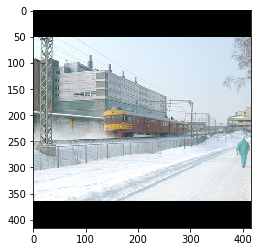

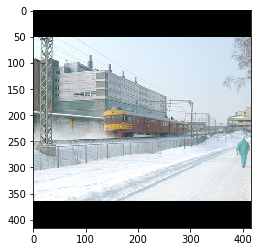

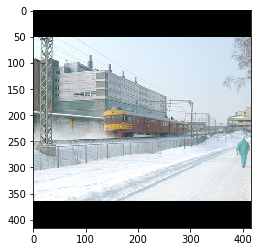

In [79]:
file = random.choice(files)
filename, file_extension = os.path.splitext(file)

image, boxes = H.resize_image(filename)

# image = load_img('test.jpeg', target_size=(416, 416))
# convert to numpy array
image = img_to_array(image)
# scale pixel values to [0, 1]
image = image.astype('float32')
image /= 255.0
image = expand_dims(image, 0)
image.shape

anchors_scale_1 = np.array([[32,38],[70,99],[100,114]])
anchors_scale_2 = np.array([[138,142],[175,185],[232,224]])
anchors_scale_3 = np.array([[253,272],[347,279],[371,355]])

# (10×13),(16×30),(33×23),(30×61),(62×45),(59×119),(116×90),(156×198),(373×326)

anchors = [anchors_scale_1, anchors_scale_2, anchors_scale_3]

for p, a in zip(pred, anchors):
    
    s = p[0,:,:,:].shape
    pr = p[0,:,:,:]
    
    r = pr.reshape(s[0],s[1],3,25)
    
#     print(r[:,:,:,4])
    
    boxes = process_output(p[0,:,:,:], a, 0.1, 416, 416)
    show(image[0,:,:,:], boxes, classnames)
    